<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار 1401
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین دوم عملی
            	<br/>
			</font>
طراح: علیرضا نوروزی 
			<br/><br/> 
موعد تحویل: 3 اردیبهشت 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال اول
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       در این تمرین قصد داریم مرحله پلی آف مسابقات NBA را شبیه سازی کنیم.
        هر سری در مرحله پلی آف به صورت 4از 7 برگزار میشود به این معنی که 2 تیم تا وقتی یکی از بین شان 4 پیروزی کسب کند
بازی ها را ادامه میدهند       .
        حال شما برای شروع کافی است تابعی بنویسید که احتمال برد یک سری از بازی را محاسبه کند.
        میتوانید این سری را 1000 بار تکرار کنید و تعداد باری که تیم با احتمال برد p برنده میشود را گزارش کنید.
        فرض کنید تیم یک در هر بازی به احتمال p برنده میشود.
        و بسکتبال تساوی هم ندارد.
        
</div>

In [1]:
library("ggplot2")
library("reshape2")
options(repr.plot.width=15, repr.plot.height=8)
playoff <- function(p, n = 7, trials = 5000) {
    x <- replicate(trials, sum(sample(c(TRUE, FALSE), replace = TRUE, size = n, prob = c(p, 1 - p)), na.rm = TRUE) > n %/% 2)
    return(sum(x, na.rm = TRUE) / trials)
}

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        حال برای p های بزرگتر از نیم احتمال برنده شدن سری را محاسبه کنید.
        و نمودار مناسبی برای نمایش این اعداد رسم کنید.
</div>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



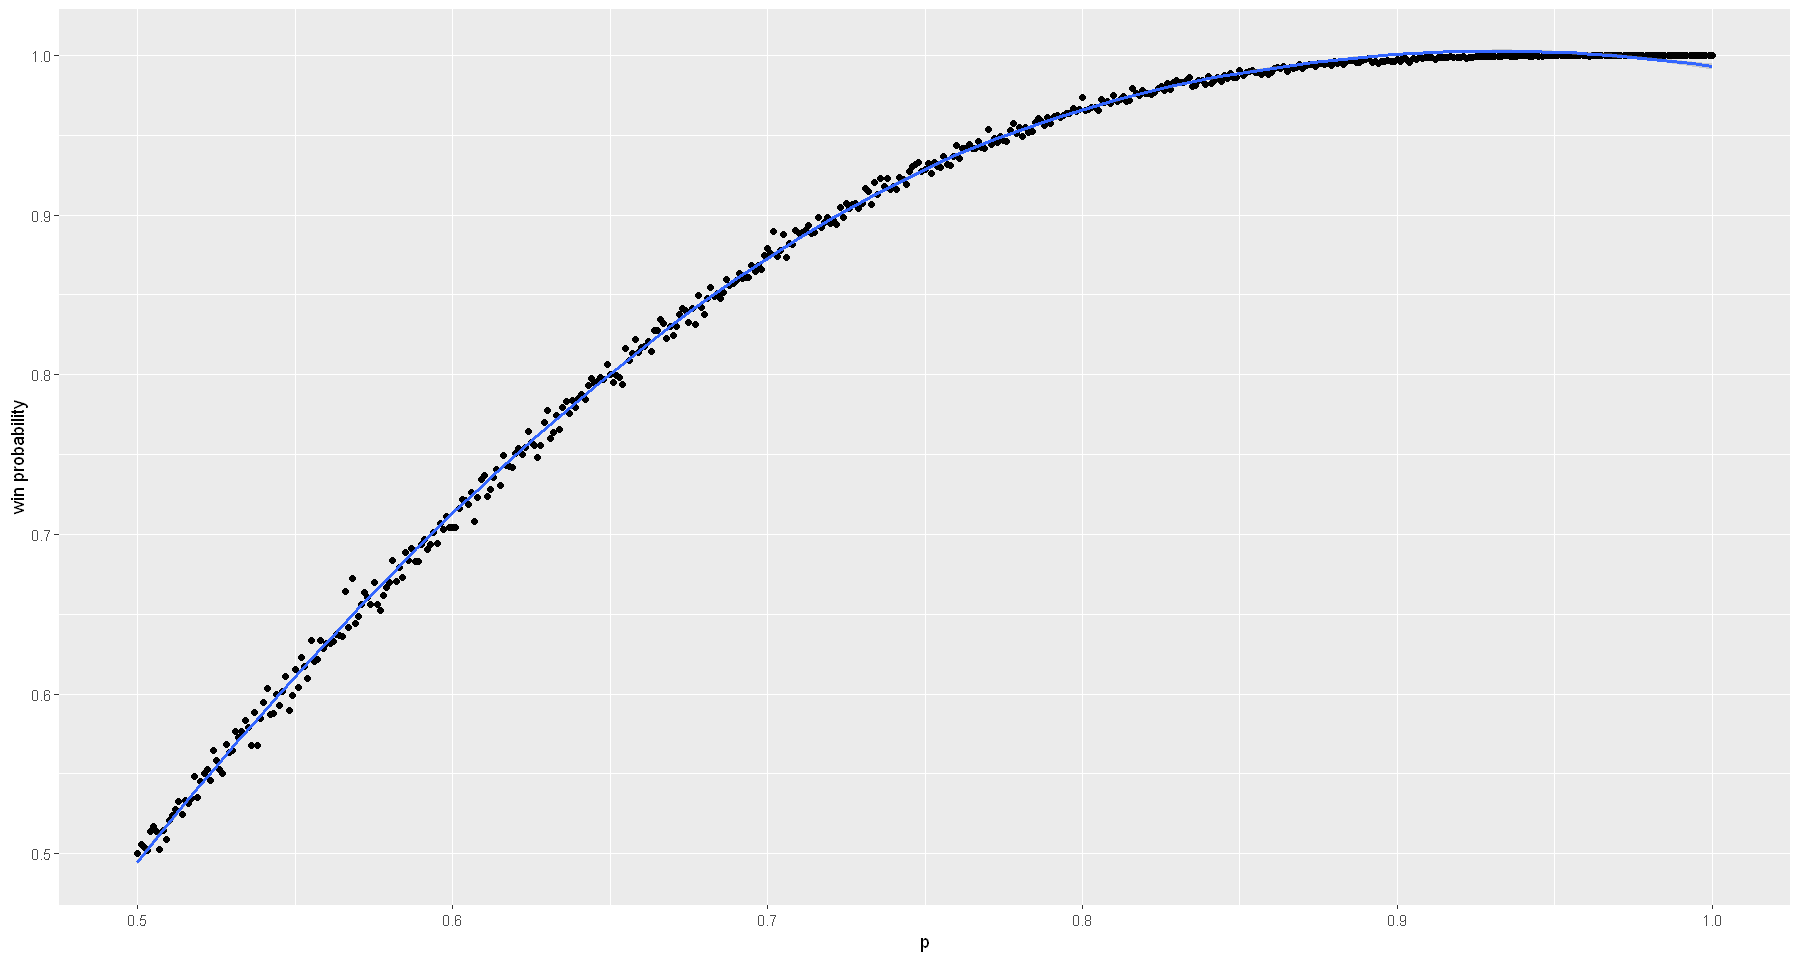

In [2]:
prob <- seq(0.5, 1, by = 0.001)
result <- sapply(prob, function(p) playoff(p))
print(ggplot(data.frame(prob, result), aes(prob, result)) +
    geom_point() +
    geom_smooth() +
    xlab("p") +
    ylab("win probability"))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با رسم نمودار برای n و p های مختلف نشان دهید برای تیم های قوی تر
        هر چه تعداد n بیشتر باشد
        احتمال اینکه یک سری را ببازند کمتر میشود و این نسبت را ببینید، مثلا برای p = 0.6 مقادیر مختلف n را بررسی کنید.
</div>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



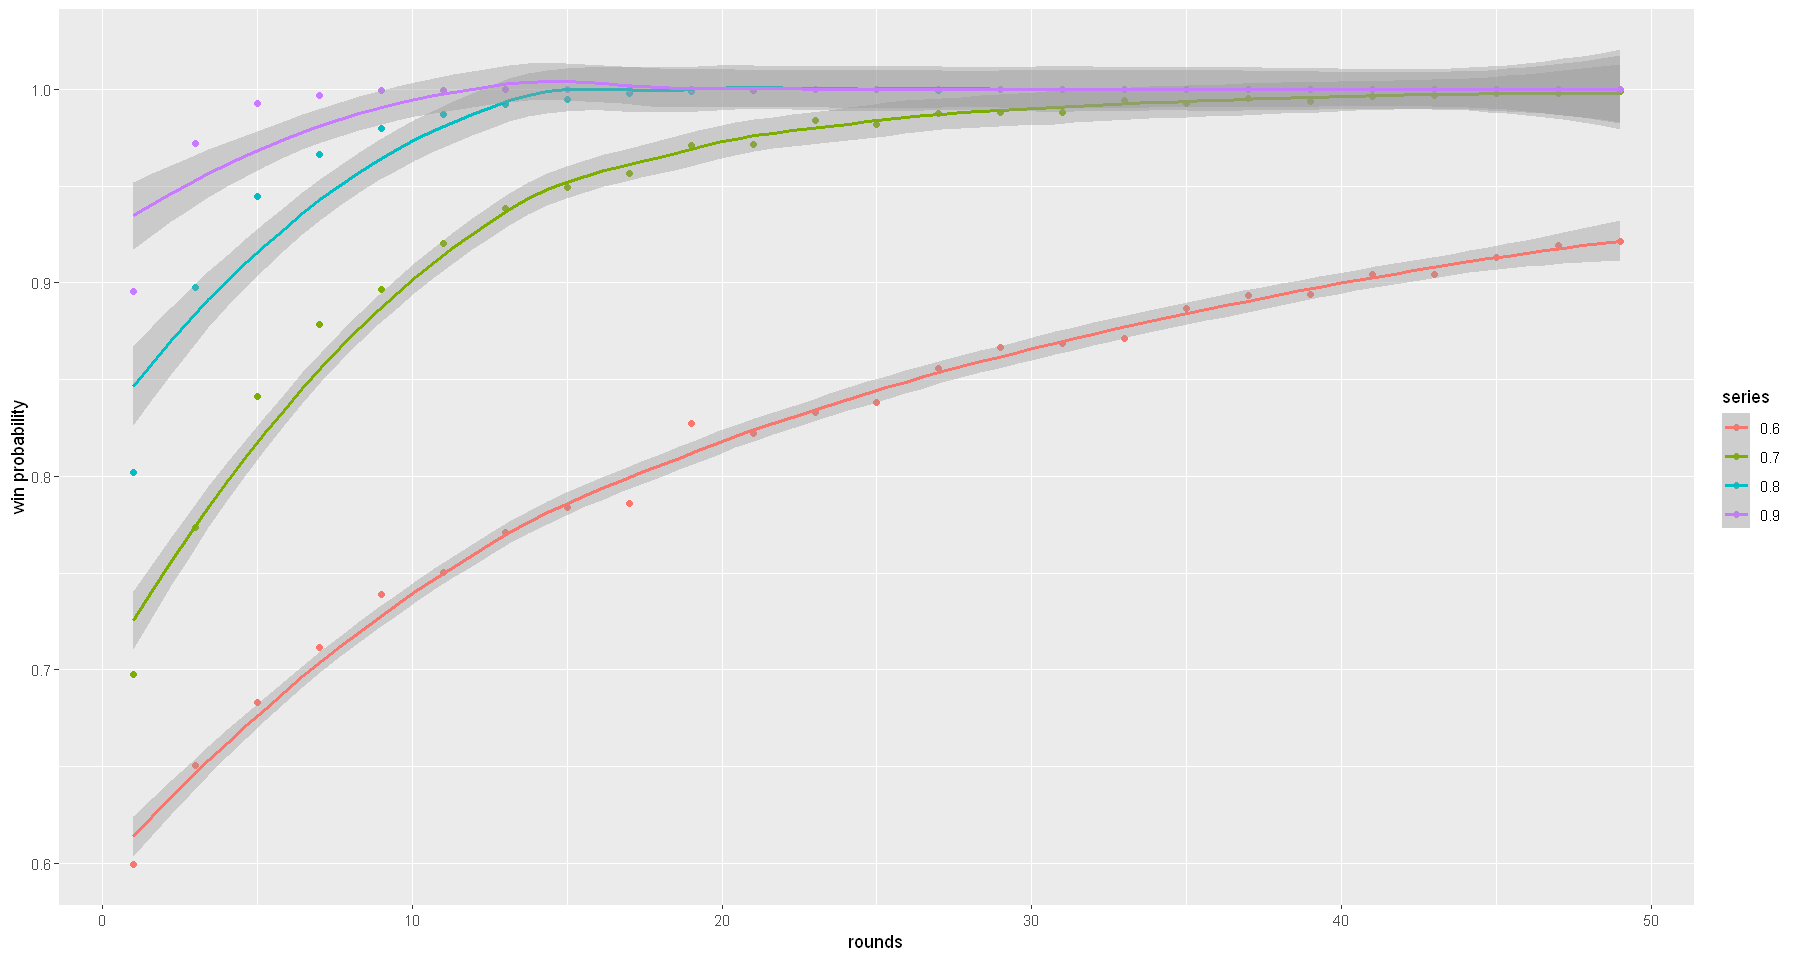

In [3]:
numbers <- seq(1, 50, by = 2)
data <- data.frame(numbers)
for (p in seq(0.6, 0.9, by = 0.1)) {
    data[toString(p)] <- sapply(numbers, function(n) playoff(p, n))
}
data <- melt(data, id.vars = 'numbers', variable.name = 'series')
print(ggplot(data, aes(numbers, value)) +
      geom_point(aes(colour = series)) +
      geom_smooth(aes(colour = series)) +
      xlab("rounds") +
      ylab("win probability"))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       میدانیم از این 7 سری بازی 4 بازی در زمین تیم 1 و 3 بازی در تیم 2 انجام میشود.
            تابع قسمت قبل را به نحوی باز سازی کنید که هم احتمال برد در خانه و احتمال برد خارج از خانه و اینکه 4 بازی میکند یا 3 بازی را دریافت و مانند تابع قبلی احتمال برد
       سری را حساب کند
</div>

In [4]:
# p_home: probability of team one winning in home
# p_non_home: probability of team one winning outside home
# home_games_n: number of matches in home
# none_home_games_n: number of matches outside home
playoff <- function(p_home, p_non_home, home_games_n, none_home_games_n, trials = 5000) {
    to_win <- (home_games_n + none_home_games_n) %/% 2
    x <- replicate(trials, {
        result <- c(
            sample(c(TRUE, FALSE), replace = TRUE, size = home_games_n, prob = c(p_home, 1 - p_home)),
            sample(c(TRUE, FALSE), replace = TRUE, size = none_home_games_n, prob = c(p_non_home, 1 - p_non_home))
        )
        return(sum(result, na.rm = TRUE) > to_win)
    })
    return(sum(x, na.rm = TRUE) / trials)
}

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       به ازای مقادیر مختلف احتمال برد در خانه، احتمال برد در خارج از خانه و تعداد بازی در خانه نمودار مناسبی برای احتمال برد سری رسم کنید.
        برای رسم همه نمودار ها در یکجا درباره facet_wrap() مطالعه کنید.
</div>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



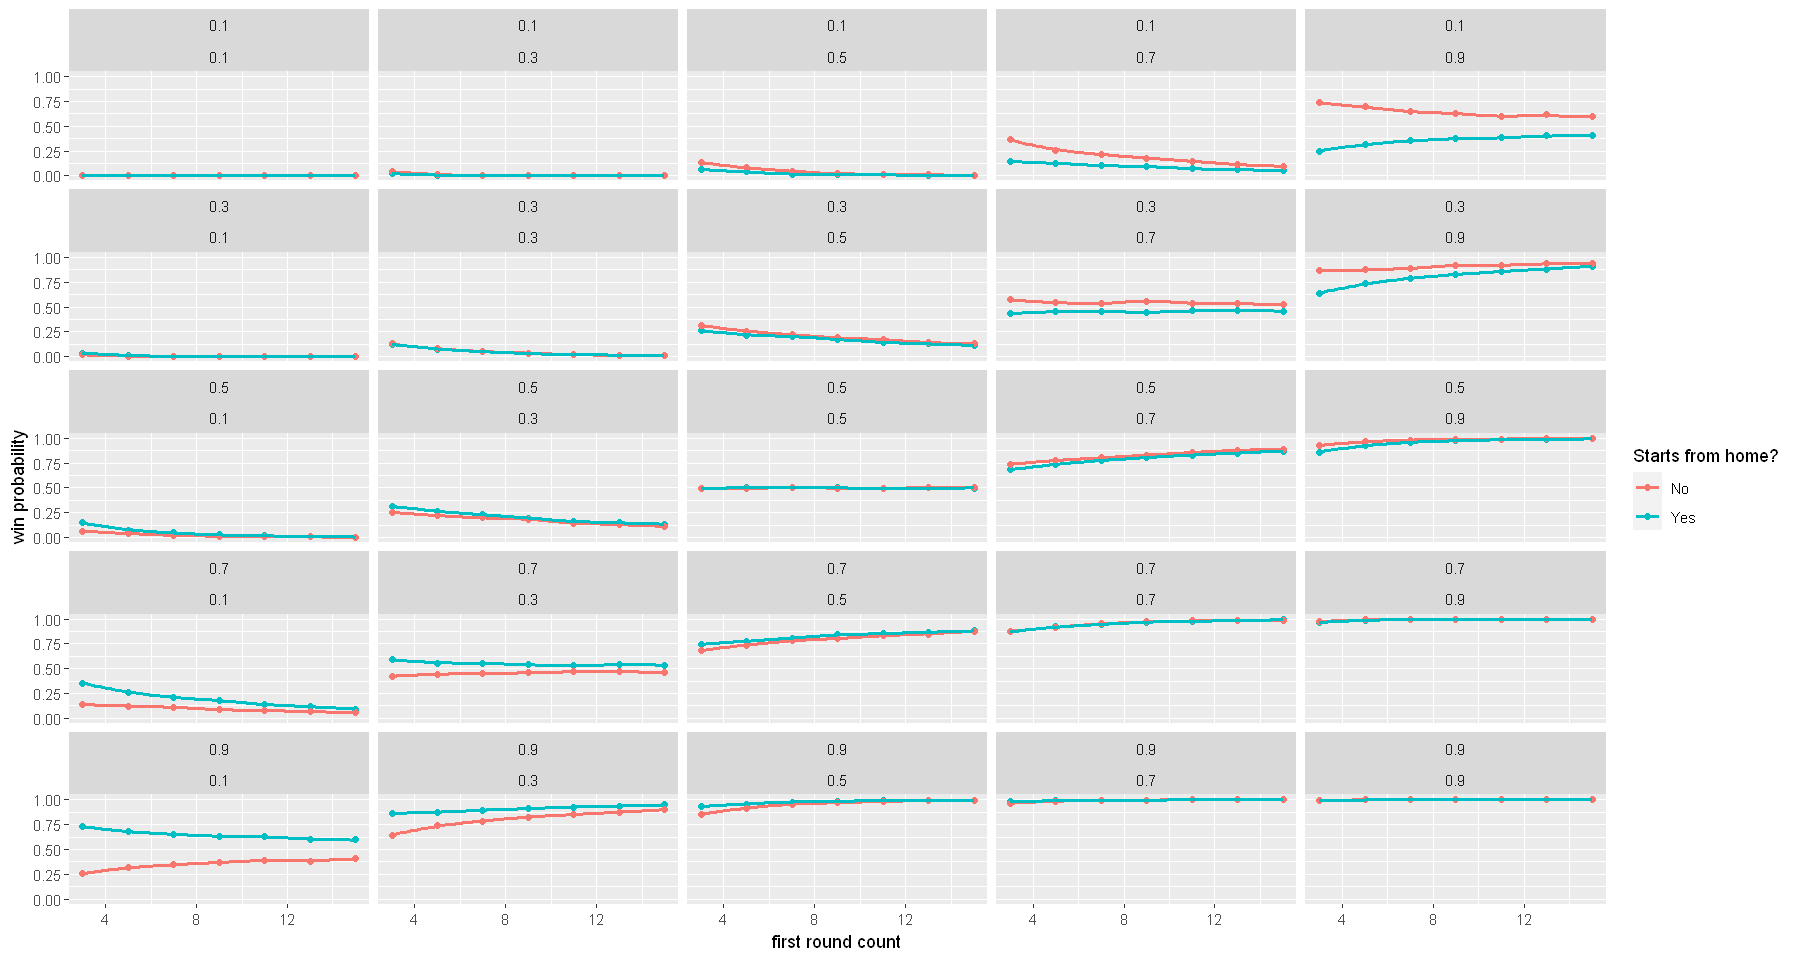

In [5]:
columns <- c("home_win_p", "non_home_win_p", "starts_from_home", "start_matches", "win_p")
data <- data.frame(matrix(nrow = 0, ncol = length(columns)))
colnames(data) <- columns
for (home_win_p in seq(0.1, 0.9, by = 0.2)) {
    for (non_home_win_p in seq(0.1, 0.9, by = 0.2)) {
        for (start_matches in seq(3, 15, by = 2)) {
            data[nrow(data) + 1, ] <- c(home_win_p, non_home_win_p, 1, start_matches,
                playoff(home_win_p, non_home_win_p, start_matches + 1, start_matches))
            data[nrow(data) + 1, ] <- c(home_win_p, non_home_win_p, 0, start_matches,
                playoff(home_win_p, non_home_win_p, start_matches, start_matches + 1))
        }
    }
}
print(ggplot(data, aes(start_matches, win_p)) +
    geom_point(aes(colour = factor(starts_from_home))) +
    geom_smooth(aes(colour = factor(starts_from_home)), se = FALSE) +
    facet_wrap(vars(home_win_p, non_home_win_p)) +
    scale_colour_discrete(labels = c("No", "Yes")) +
    labs(x = "first round count", y = "win probability", colour = "Starts from home?"))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با استفاده از geom_raster()
        نموداری رسم کنید که تاثیر شروع        
         بازی در خانه یا خارج از خانه را نشان دهد.
 
</div>

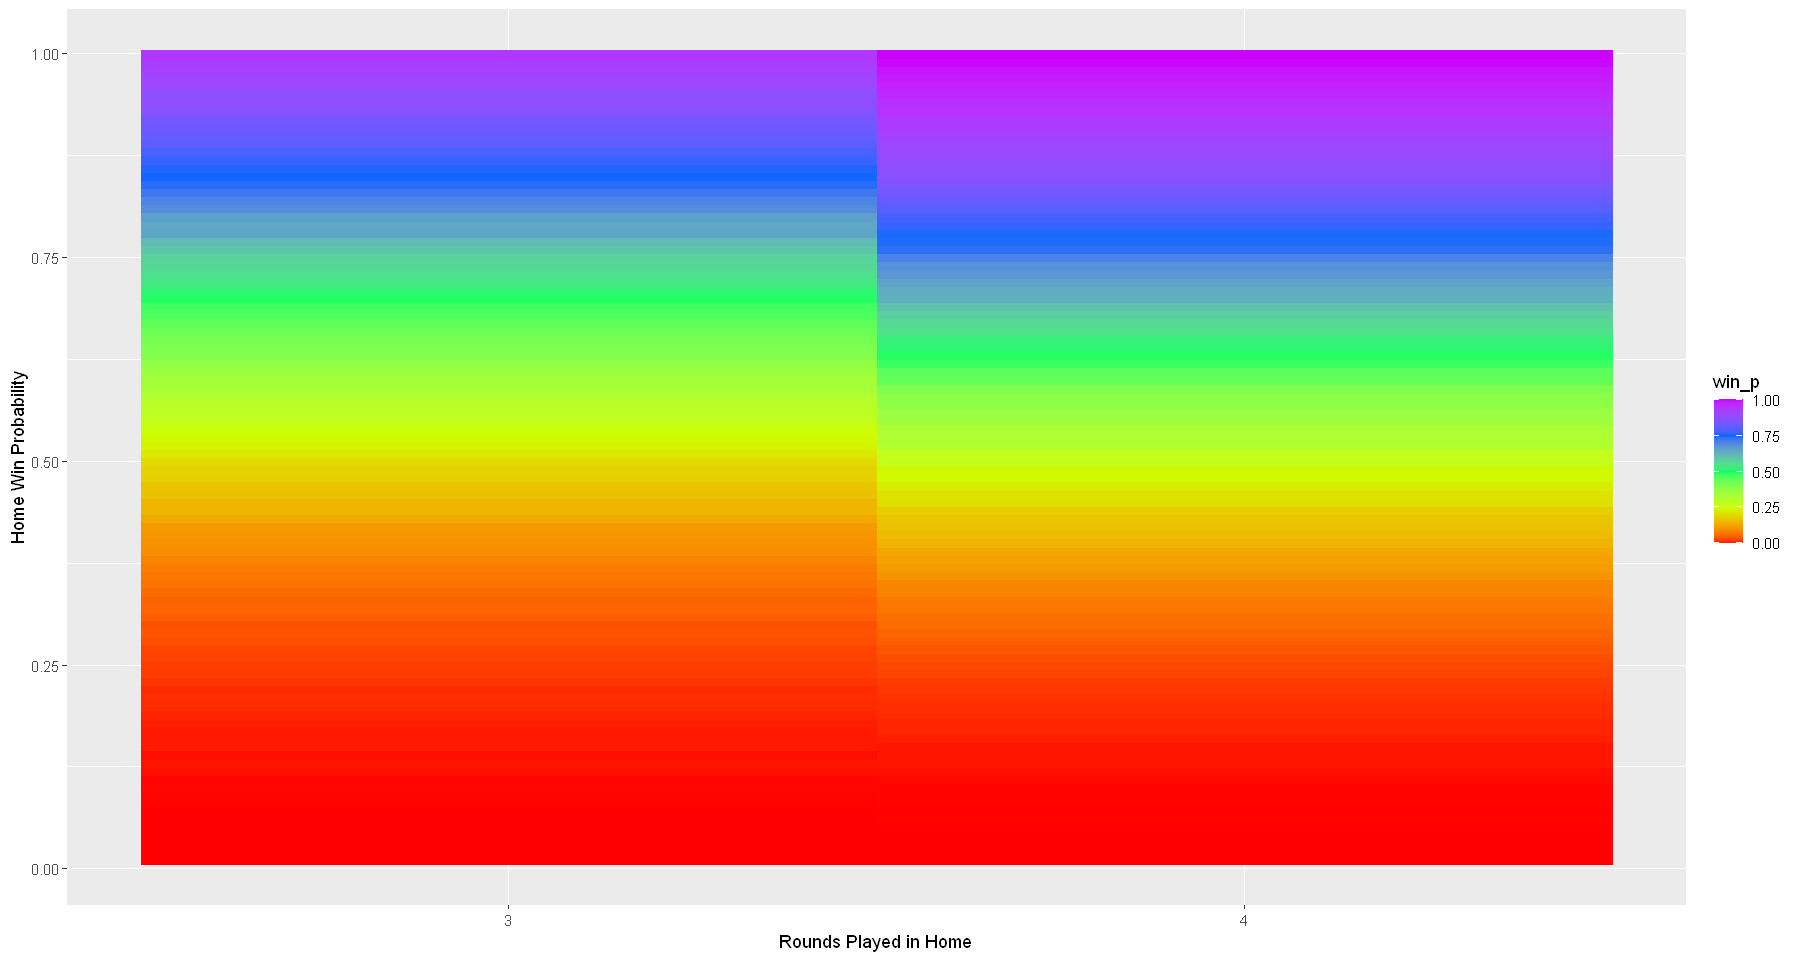

In [6]:
columns <- c("home_win_p", "home_plays_n", "win_p")
data <- data.frame(matrix(nrow = 0, ncol = length(columns)))
colnames(data) <- columns
for (home_win_p in seq(0.01, 1, by = 0.01)) {
    non_home_win_p <- home_win_p / 2
    data[nrow(data) + 1, ] <- c(home_win_p, 3,
        playoff(home_win_p, non_home_win_p, 3, 4))
    data[nrow(data) + 1, ] <- c(home_win_p, 4,
        playoff(home_win_p, non_home_win_p, 4, 3))
}
print(ggplot(data, aes(x = as.factor(home_plays_n), y = home_win_p)) +
    geom_raster(aes(fill = win_p)) +
    scale_fill_gradientn(colours = rainbow(5)) +
    labs(x = "Rounds Played in Home", y = "Home Win Probability", colour = "Win Probability"))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال دوم 
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        در یک فرایند پواسون زمان بین دو اتفاق از یک توزیع نمایی پیروی می‌کند. اگر بخواهیم زمان اتفاق n‌ام را پیش‌بینی کنیم از توزیع گاما استفاده می‌کنیم.
        $$T_n=\sum_{i=1}^n{X_i},\  X_i  s\ are\ i.i.d\ and\ X_i\sim Exp(\lambda)$$
        $$T_n\sim Gamma(n, \lambda)$$
       حال فرض کنید فاصله زمانی ورود دانشجویان به کلاس درس حضوری از توزیع پوآسون پیروی میکند.
        <br>
        الف)
        1000  نمونه تصادفی برای زمان بین ورود دانشجو ها تولید کنید و نمودارهای هیستوگرام داده‌های تولیدشده و چگالی توزیع آن را در یک نمودار رسم کنید.
        نمودار هیستوگرام شما باید چگالی احتمال را برای هر نمونه را نشان دهد.
            </font>
</div>
    </font>
</div>

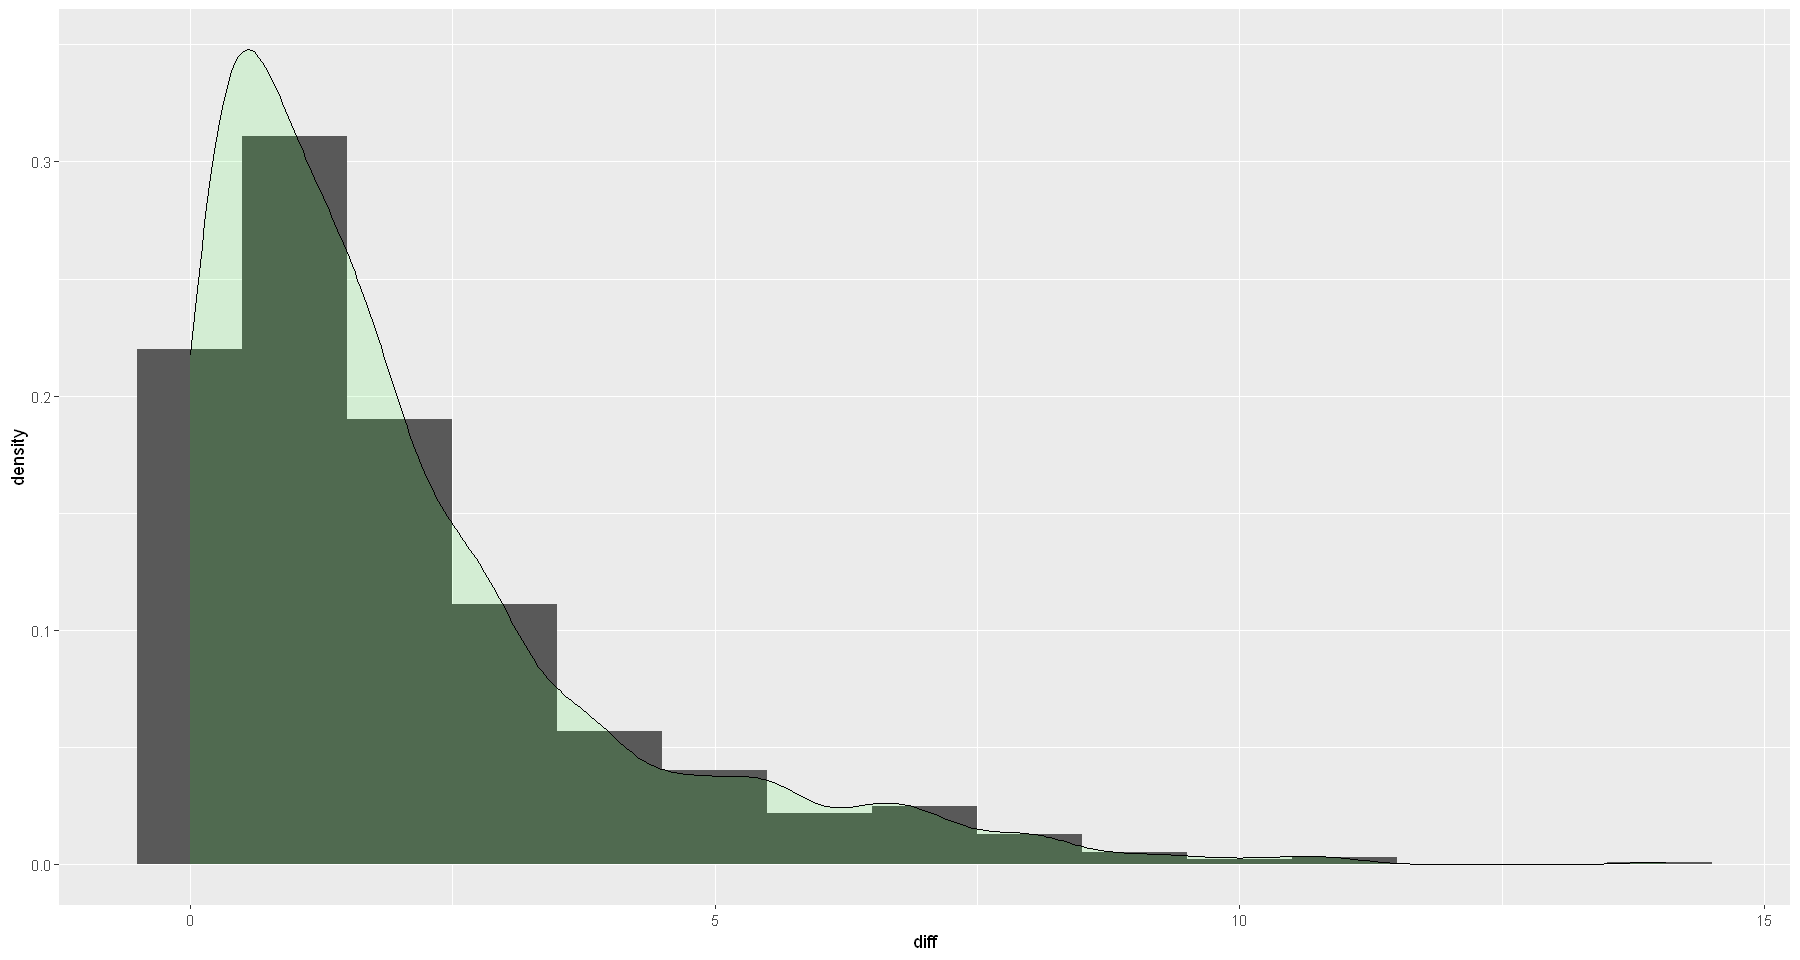

In [7]:
lambda <- 1/2
data <- data.frame(diff = replicate(1000, {
        # Uncomment these lines for pure poisson random generation
        #x <- rpois(2, lambda)
        #return(abs(x[1] - x[2]))
        return(rexp(1, lambda))
    }))
print(ggplot(data) +
    geom_histogram(aes(x = diff, y = ..density..), binwidth = 1) +
    geom_density(aes(x = diff), fill = "green", alpha = 0.1))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ب)
        بی‌حافظگی توزیع نمایی را با داده‌های تولید شده در قسمت قبل و رسم نمودار به همان شکل نشان دهید.
     </font>
</div>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



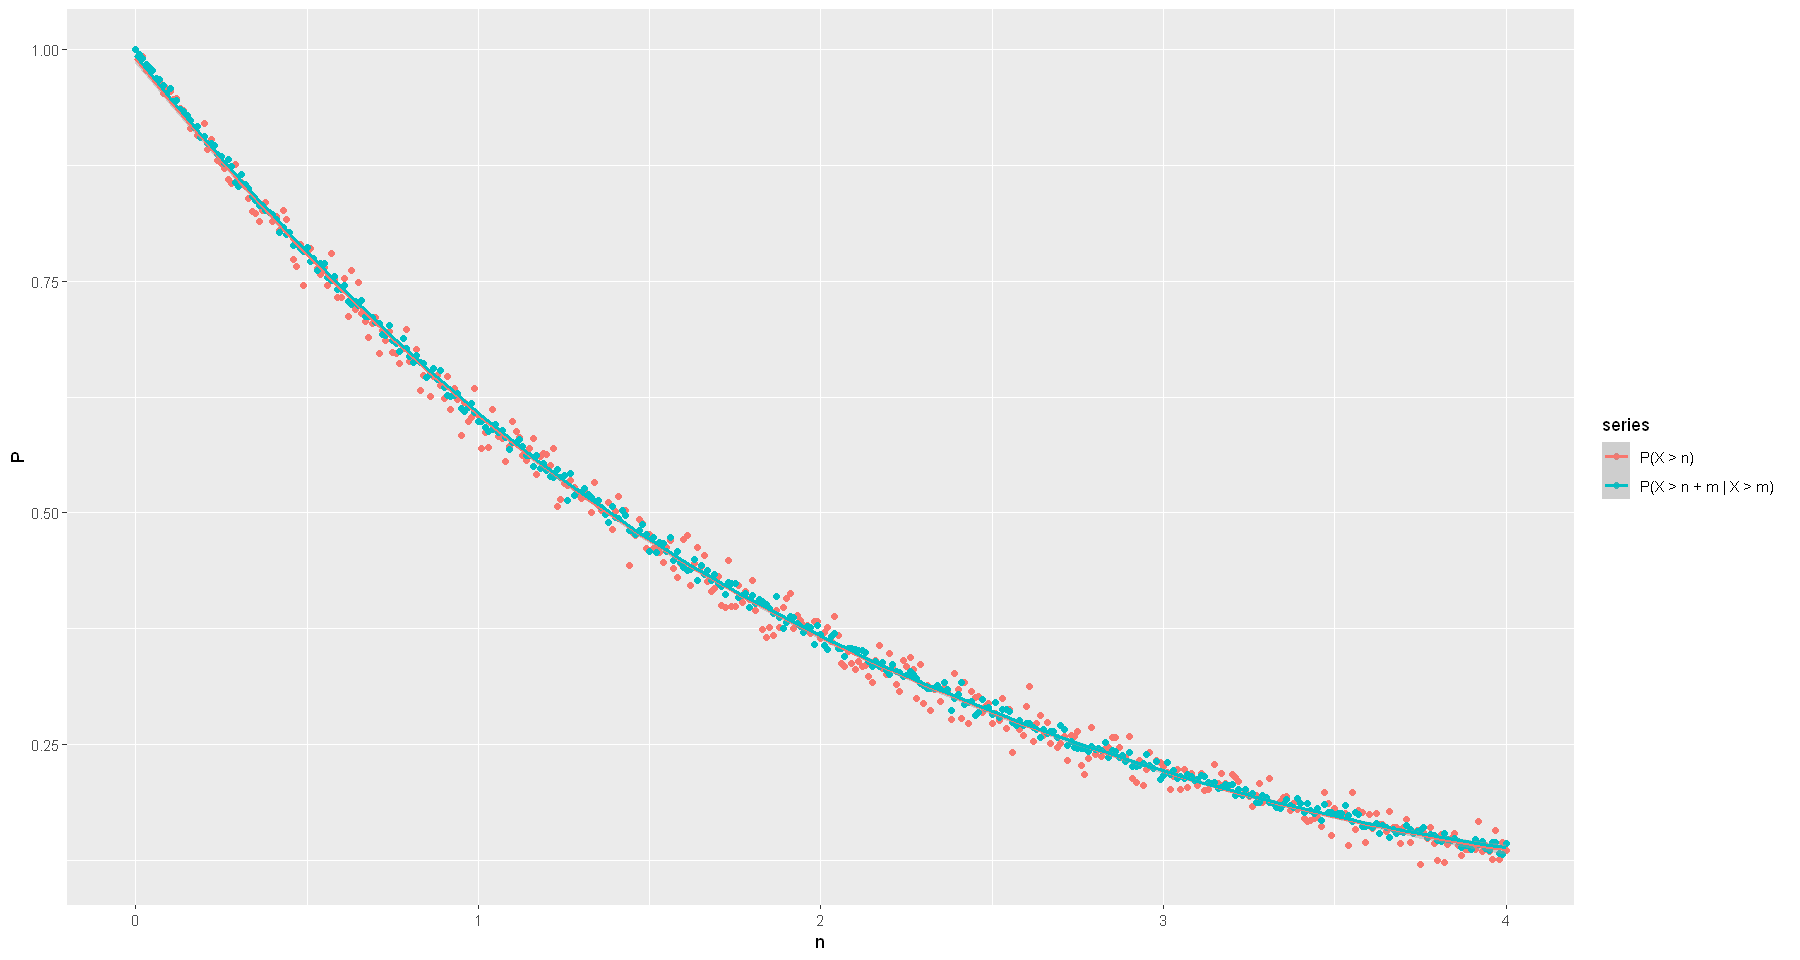

In [8]:
lambda <- 1 / 2
m <- 1
# Returns P(X > n) where X ~ Exp(lambda)
more_than <- function(lambda, n, trials = 1000) {
    x <- rexp(trials, lambda)
    return(length(x[x > n]) / trials)
}
# Returns P(X > n + m | X > m) where X ~ Exp(lambda)
more_than_if <- function(lambda, n, m, trials = 10000) {
    x <- rexp(trials, lambda)
    return(length(x[x > n + m]) / length(x[x > m]))
}
# Create the data
columns <- c("n", "P(X > n)", "P(X > n + m | X > m)")
data <- data.frame(matrix(nrow = 0, ncol = length(columns)))
colnames(data) <- columns
for (n in seq(0, 4, by = 0.01)) {
    data[nrow(data) + 1, ] <- c(n, more_than(lambda, n), more_than_if(lambda, n, m))
}
data <- melt(data, id.vars = "n", variable.name = "series")
print(ggplot(data, aes(n, value)) +
      geom_point(aes(colour = series)) +
      geom_smooth(aes(colour = series)) +
      xlab("n") +
      ylab("P"))

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ج)
       با تولید n=10 متغیرتصادفی نمایی، ویژگی گفته شده در صورت سوال را بررسی کنید. برای این‌کار می‌توانید برای شبیه‌سازی هر متغیرتصادفی مانند قسمت الف عمل کنید. 
     </font>
</div>

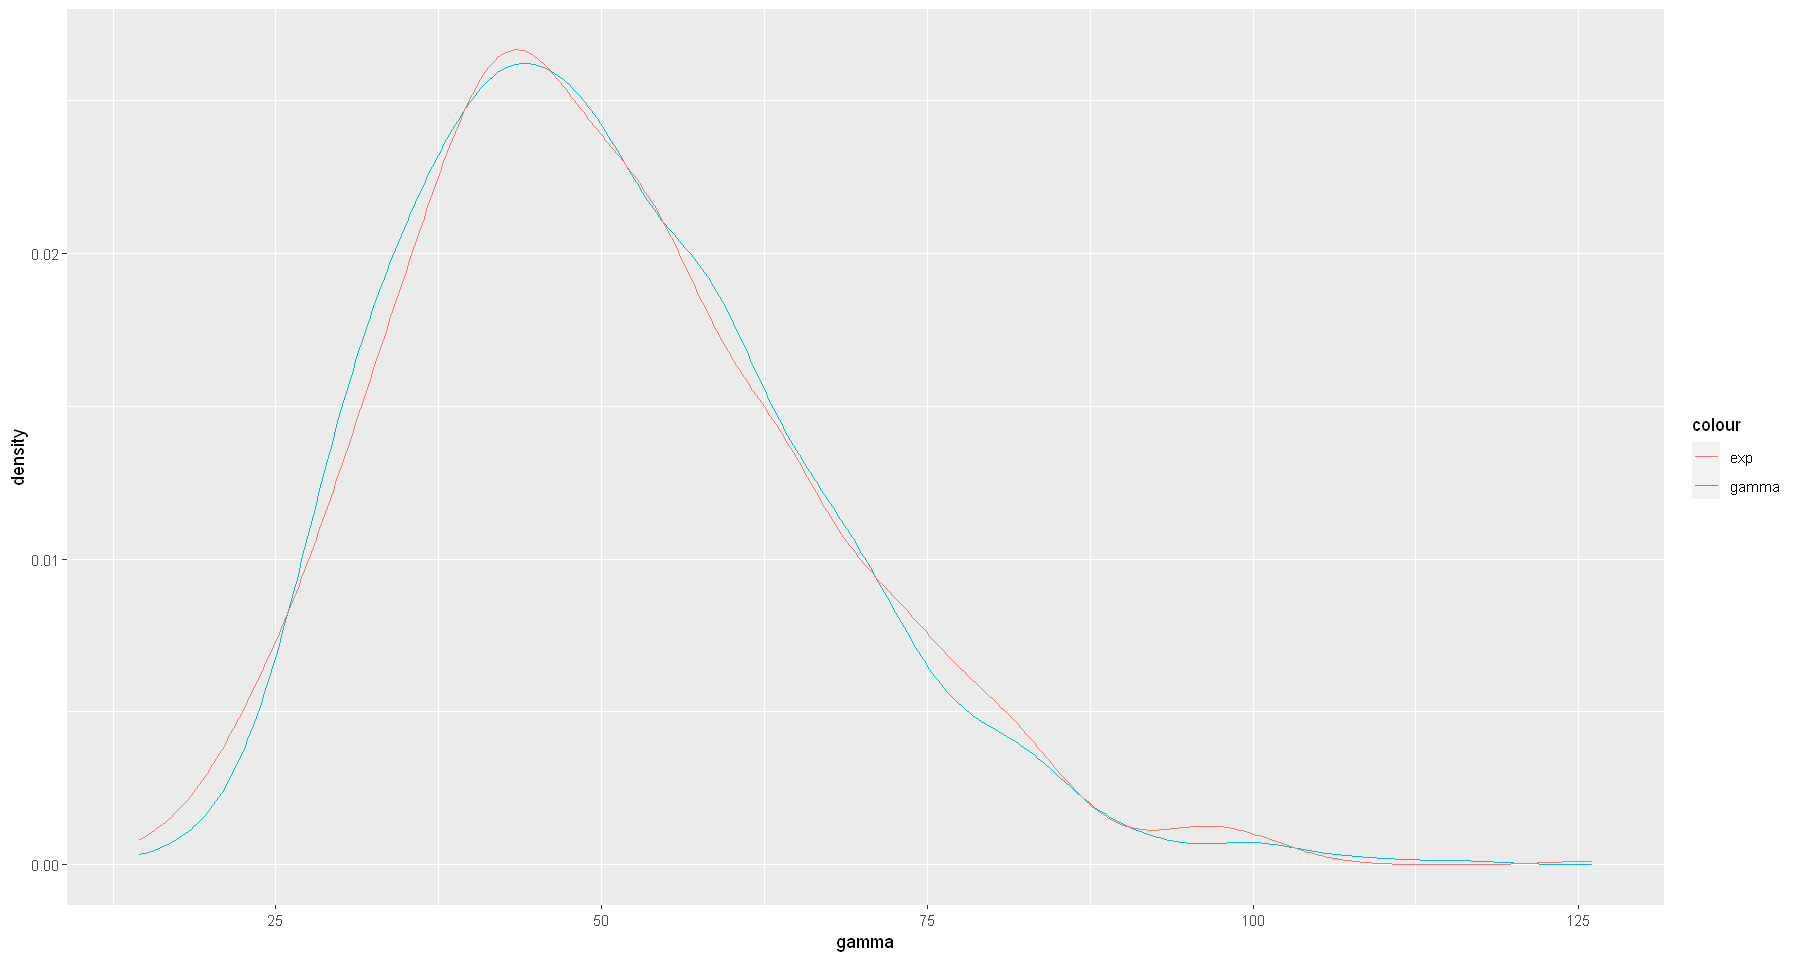

In [9]:
n <- 10
lambda <- 1/5
samples <- 1000
data <- data.frame(gamma = rgamma(samples, n, rate = lambda), exp = replicate(samples, sum(rexp(n, rate = lambda))))
print(ggplot(data) +
    stat_density(aes(x = gamma, colour = "gamma"), geom="line", position="identity") +
    stat_density(aes(x = exp, colour = "exp"), geom="line",position="identity"))